# TP sur k-means

Dans ce TP, vous devrez coder l'algorithme k-means.

(emprunts au Python Data Science Handbook de Jake VDP)

In [1]:
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt

### Générons des données aléatoires:

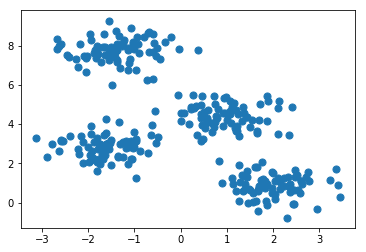

In [25]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

On obtient donc un tableau $X \in \mathbb{R}^{300 \times 2}$, donc avec 300 lignes et 2 colonnes


### Ecriture de la fonction `find_clusters`

Le but de cette partie sera de complêter le code de la fonction `find_clusters` ci-dessous, afin qu'elle réalise un k-means.

Lisez attentivement le code incomplet de la fonction `find_clusters` ci-dessous. Dans le code, j'utilise les trois points `...`, ce qui correspond en python à l'instruction "ne rien faire".

**Exercice**: Exécutez la fonction `find_clusters` et expliquez ce que cette fonction renvoie (et pourquoi elle renvoie cela).

**Exercice**: Ecrivez une fonction `dist(x,y)` qui calcule la distance euclidienne entre les vecteurs `x` et `y`.

**Exercice**: Remplacez les `...` de cette fonction par les instructions manquantes pour obtenir un algorithme de k-means. Vérifiez que cette fonction marche bien en affichant le résultat (voir ci-dessous)

**Exercice (bonus)**: Modifiez l'algorithme pour qu'au lieu que les représentants des clusters soient leur barycentre, on choisisse à la place le point de `X` le plus proche du barycentre.

In [29]:
def find_clusters(X, K):
    # n=nb d'exemples, d=nb de variables, K=nb de clusters
    n,d = X.shape
    indices   = np.random.choice(range(n),size=K)
    centroids = X[indices,:]                     # centroids[i] est un vecteur de dimension d, egale au ième centroid.
    labels    = np.random.randint(K,size=n)      # labels[i]   indique le numero du cluster affecté à X[i]

    while True:
        # Pour chaque point X[i], trouver le cluster qui est le plus proche, et le ranger dans labels[i]
        for i in range(n):
            dist_ini = dist(X[i],centroids[0])
            labels[i] = 0
            for j in range(K):
                if dist(X[i],centroids[j]) < dist_ini:
                    dist_ini = dist(X[i],centroids[j])
                    labels[i] = j
                    
        # Mettre a jour les centroids
        new_centroids = np.zeros((n,d))
        for k in range(K):
            # calculer le centroid du cluster k, et le stocker dans new_centroid[k]
            nb_el = 0
            somme_x0 = 0
            somme_x1 = 0
            for i2 in range(n):
                if labels[i2] == k:
                    nb_el += 1
                    somme_x0 += X[i2][0]
                    somme_x1 += X[i2][1]
            new_centroids[k][0] = somme_x0/nb_el
            new_centroids[k][1] = somme_x1/nb_el
        
        # Si convergence alors s'arréter
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels


def dist(x, y):
    dist = np.linalg.norm(x - y)
    return dist

### Affichage du résultat:

/Users/utilisateur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


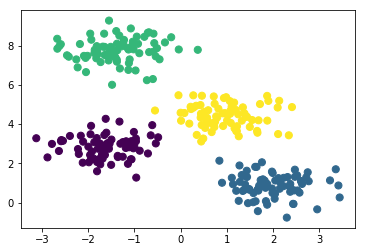

In [33]:
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=50, cmap='viridis');